In [2]:
#CIFAR-10 데이터셋 : 10가지 사물이 담긴 컬러 이미지
# 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭
#6만장 (학습용 5만장, 검증용 1만장)
#32x32 이미지
#32x32x3 RGB 컬러 이미지
# http://www.cs.toronto.edu/~kriz/cifar.html
from tensorflow.keras import datasets, utils
def make_data():
    #다운로드 경로 : 사용자 계정 디렉토리 하위의 .keras 디렉토리
    (X_train, y_train), (X_test,y_test)=datasets.cifar10.load_data()
    #원 핫 인코딩 처리
    y_train=utils.to_categorical(y_train,10)
    y_test=utils.to_categorical(y_test,10)
    #데이터 정규화
    X_train=X_train.astype("float32")
    X_test=X_test.astype("float32")
    X_train /= 255
    X_test /= 255
    return (X_train,y_train), (X_test,y_test)

In [3]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Activation,Flatten, Dropout
def make_model():
    model=Sequential()
    #padding="same" 출력크기를 입력크기와 같게 유지
    model.add(Conv2D(32,(3,3),padding="same", input_shape=X_train.shape[1:],activation='relu'))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    #학습률 0.0001, decay 학습속도를 감소시키는 옵션
    opt=optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)
    model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    return model

In [4]:
a=isinstance(1, int) # True
b=isinstance(1.2, float) # True

In [5]:
def plot_loss(history, title=None):
    #history가 dict 타입이 아니면
    if not isinstance(history, dict):
        history=history.history
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    #타이틀이 설정되어 있지 않으면
    if title is not None:
        plt.title(title)
    plt.ylabel("손실")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능","검증 데이터 성능"],loc=0)

In [6]:
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history=history.history
    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])
    if title is not None:
        plt.title(title)
    plt.ylabel("정확도")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능","검증 데이터 성능"],loc=0)

In [7]:
(X_train,y_train),(X_test,y_test)=make_data()

In [8]:
X_train.shape

(50000, 32, 32, 3)

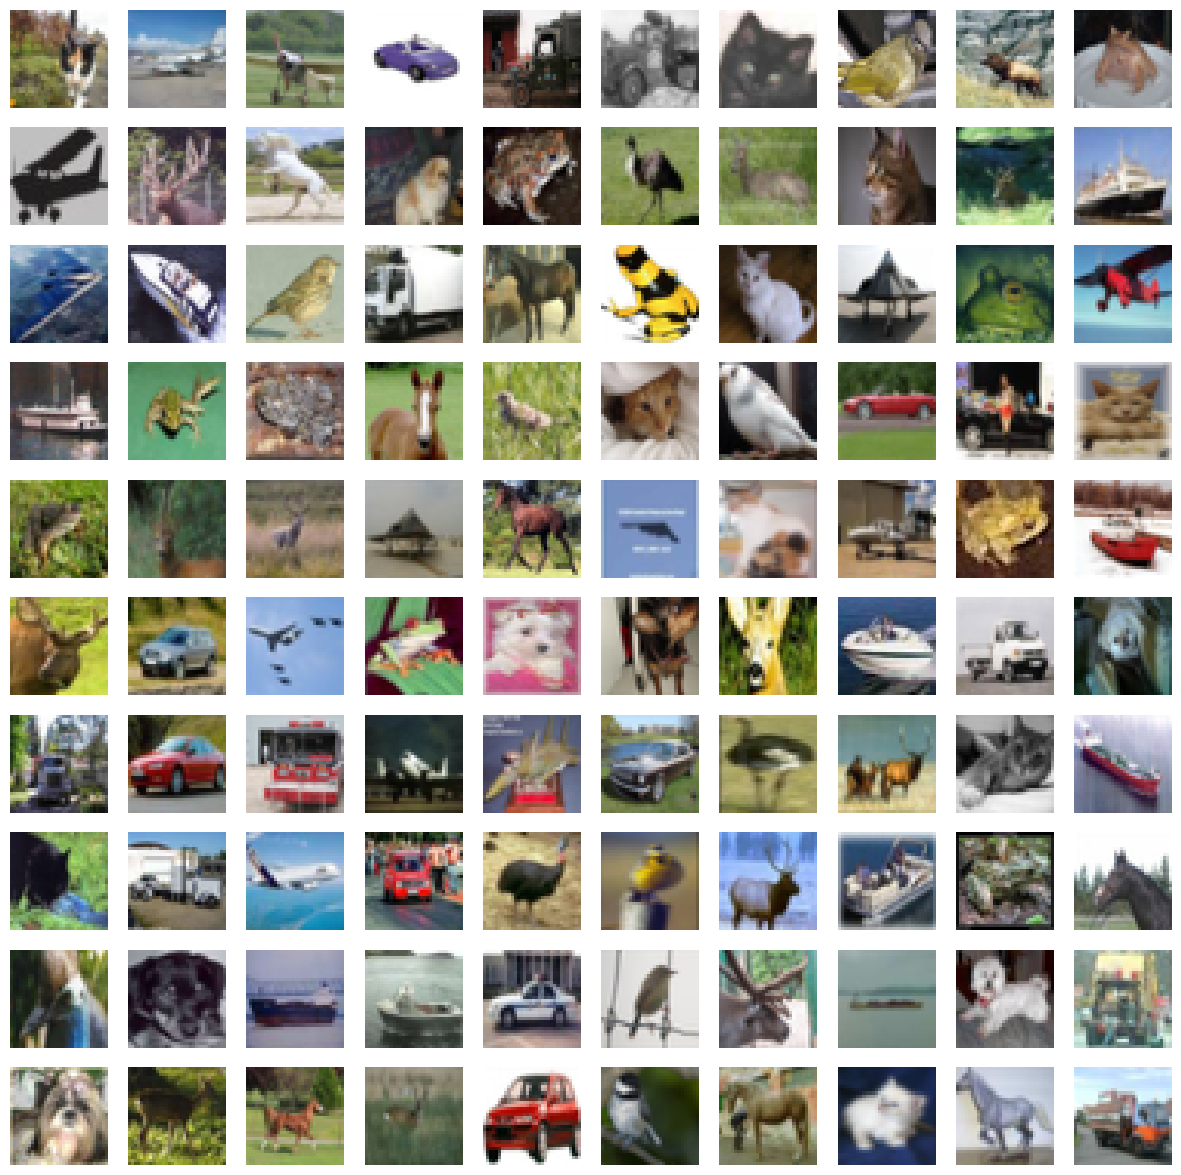

In [9]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes1=plt.subplots(10,10,figsize=(15,15))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i:i+1][0])

In [10]:
#모델 생성
model=make_model()

In [11]:
#학습 시간이 오래 걸림
import tensorflow as tf
with tf.device('/GPU:0'):
    history=model.fit(X_train,y_train,epochs=25,batch_size=32,validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 17s 12ms/step - loss: 1.8153 - accuracy: 0.3420 - val_loss: 1.5743 - val_accuracy: 0.4373
Epoch 2/25
1250/1250 [==============================] - 14s 12ms/step - loss: 1.5106 - accuracy: 0.4569 - val_loss: 1.4548 - val_accuracy: 0.4878
Epoch 3/25
1250/1250 [==============================] - 14s 11ms/step - loss: 1.3533 - accuracy: 0.5179 - val_loss: 1.3037 - val_accuracy: 0.5353
Epoch 4/25
1250/1250 [==============================] - 14s 12ms/step - loss: 1.2386 - accuracy: 0.5624 - val_loss: 1.1668 - val_accuracy: 0.5916
Epoch 5/25
1250/1250 [==============================] - 14s 12ms/step - loss: 1.1505 - accuracy: 0.5938 - val_loss: 1.0978 - val_accuracy: 0.6211
Epoch 6/25
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0823 - accuracy: 0.6190 - val_loss: 1.0573 - val_accuracy: 0.6291
Epoch 7/25
1250/1250 [==============================] - 14s 12ms/step - loss: 1.0263 - accuracy: 0.6416 - val_loss: 0.9998 -

In [12]:
#성능 평가
performance_test=model.evaluate(X_test,y_test,batch_size=128)
print(performance_test)

79/79 [==============================] - 1s 7ms/step - loss: 0.7504 - accuracy: 0.7502
[0.7504155039787292, 0.7501999735832214]


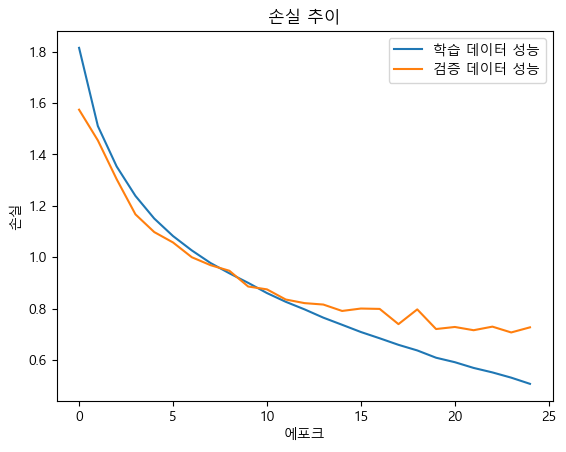

In [13]:
import matplotlib
import matplotlib.font_manager as fm
font_location="c:/windows/fonts/malgun.ttf"
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc("font",family=font_name)
plot_loss(history,"손실 추이")
plt.show()

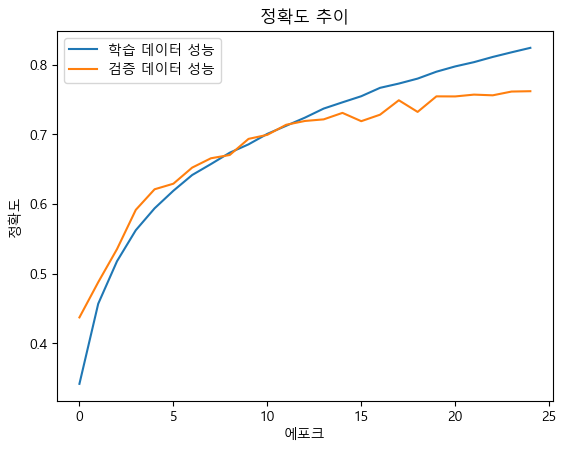

In [14]:
plot_acc(history, '정확도 추이')
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test,verbose=1)
y_pred=np.argmax(y_pred, axis=1)
confusion_matrix(np.argmax(y_test,axis=1),y_pred)

313/313 [==============================] - 1s 2ms/step


array([[791,  15,  20,  23,  13,   4,   6,  11,  76,  41],
       [ 15, 846,   1,  11,   2,   4,   8,   2,  17,  94],
       [ 80,   4, 517, 114,  83,  79,  52,  45,  15,  11],
       [ 22,   5,  22, 653,  54, 138,  32,  48,  14,  12],
       [ 17,   4,  45, 106, 679,  34,  28,  74,  11,   2],
       [ 17,   0,  13, 201,  33, 646,  15,  63,   5,   7],
       [  7,   2,  15,  94,  28,  25, 814,   6,   6,   3],
       [  9,   3,   9,  35,  32,  37,   3, 860,   2,  10],
       [ 47,  33,   3,  20,   2,   7,   5,   4, 847,  32],
       [ 23,  53,   3,  17,   4,   6,   4,  20,  21, 849]], dtype=int64)

In [16]:
model.save('c:/data/cifar/cifar.h5')